<a href="https://colab.research.google.com/github/tisRobin/Specification_Filter_-Sentiment_Classification-/blob/main/Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
text = pd.read_csv('/content/gdrive/MyDrive/DATUM/Sentiment Analysis project/Amazon review.csv', header=None)

In [ ]:
text.columns = ['label', 'title', 'review']
text.head()

,label,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
len(text)

3600000

In [ ]:
text.drop('title', inplace=True, axis=1)

In [ ]:
text.head()

,label,review
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."


In [ ]:
X = text['review']

y = text['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [ ]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [ ]:
X_tfidf = tfidf.transform(X)

In [ ]:
X_train_tfidf = tfidf.transform(X_train)

In [ ]:
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression(max_iter = 1000)
logr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
def report(model):
  preds = model.predict(X_test_tfidf)
  print(classification_report(y_test, preds))
  plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

           1       0.81      0.83      0.82    360033
           2       0.83      0.81      0.82    359967

    accuracy                           0.82    720000
   macro avg       0.82      0.82      0.82    720000
weighted avg       0.82      0.82      0.82    720000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


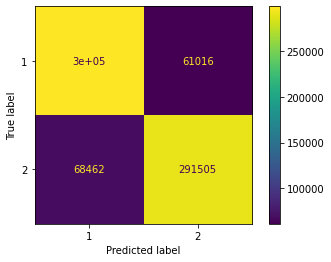

In [ ]:
report(nb)

              precision    recall  f1-score   support

           1       0.88      0.87      0.88    360033
           2       0.87      0.88      0.88    359967

    accuracy                           0.88    720000
   macro avg       0.88      0.88      0.88    720000
weighted avg       0.88      0.88      0.88    720000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


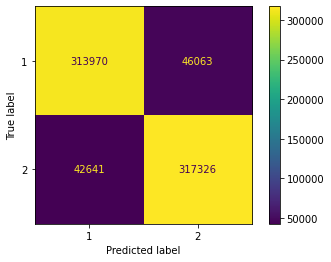

In [ ]:
report(logr_model)

              precision    recall  f1-score   support

           1       0.88      0.87      0.87    360033
           2       0.87      0.88      0.87    359967

    accuracy                           0.87    720000
   macro avg       0.87      0.87      0.87    720000
weighted avg       0.87      0.87      0.87    720000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


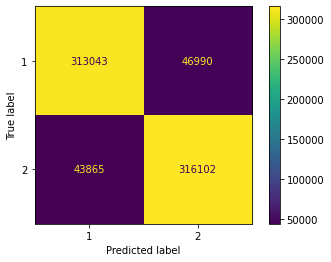

In [ ]:
report(linear_svc)

In [ ]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=linear_svc,
                          estimator2=logr_model,
                          X=X_tfidf, y=y,
                          random_seed=1)

print('t statistic: %.10f' % t)
print('p value: %.10f' % p)

t statistic: -27.6661710828
p value: 0.0000011548


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=nb,
                          estimator2=logr_model,
                          X=X_tfidf, y=y,
                          random_seed=1)

print('t statistic: %.10f' % t)
print('p value: %.10f' % p)

t statistic: -194.3012403904
p value: 0.0000000001


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=linear_svc,
                          estimator2=nb,
                          X=X_tfidf, y=y,
                          random_seed=1)

print('t statistic: %.10f' % t)
print('p value: %.10f' % p)

t statistic: 148.2318002632
p value: 0.0000000003


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('logr_model',LogisticRegression(max_iter = 1000))])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logr_model', LogisticRegression(max_iter=1000))])

In [ ]:
def predict(text):
  return pipe.predict([text])[0]

In [ ]:
Seph_raw = pd.read_csv('/content/gdrive/MyDrive/DATUM/Sentiment Analysis project/product_data_sephora.csv',encoding='utf-8', header=None)

In [ ]:
Seph_raw.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3.0,4,5,6,7,8,9
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,Drunk Elephant,NaN,$68.00,315.2K,4 stars,This is my ride or die. I will always go back ...,2 stars,Protini™ Polypeptide Moisturizer
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,Drunk Elephant,NaN,$68.00,315.2K,4 stars,Feels very moisturizing and soft on the skin w...,1 star,Protini™ Polypeptide Moisturizer
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,Drunk Elephant,NaN,$68.00,315.2K,4 stars,I thought about purchasing this for MONTHS bef...,4 stars,Protini™ Polypeptide Moisturizer
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,Drunk Elephant,NaN,$68.00,315.2K,4 stars,Love this cream. Have purchased 5 jars already...,5 stars,Protini™ Polypeptide Moisturizer


In [ ]:
Seph = Seph_raw[7]

In [ ]:
Seph = Seph.to_frame()
Seph = Seph.drop(0)

In [ ]:
Seph.columns = ['Review']
Seph = Seph.fillna(' ')
Seph.head()

,Review
1,This is my ride or die. I will always go back ...
2,Feels very moisturizing and soft on the skin w...
3,I thought about purchasing this for MONTHS bef...
4,Love this cream. Have purchased 5 jars already...
5,I love this product and my dermatologist appro...


In [ ]:
len(Seph)

16218

In [ ]:
Seph['Sentiment'] = np.vectorize(predict)(Seph['Review'])

            1: negative
            2: positive

In [ ]:
Seph['Sentiment'].replace({1: 'negative', 2: 'positive'}, inplace = True)

In [ ]:
Seph.head()

,Review,Sentiment
1,This is my ride or die. I will always go back ...,positive
2,Feels very moisturizing and soft on the skin w...,positive
3,I thought about purchasing this for MONTHS bef...,negative
4,Love this cream. Have purchased 5 jars already...,positive
5,I love this product and my dermatologist appro...,negative


In [ ]:
# positive ratio

ratio = len(Seph[Seph['Sentiment']== 'positive'])/len(Seph)

if 0 <= ratio < 0.2:
  print('Very Negative')
elif 0.2 <= ratio < 0.4:
  print('Negative')
elif 0.4 <= ratio < 0.6:
  print('Average')
elif 0.6 <= ratio < 0.8:
  print('Positive')
elif 0.8 <= ratio < 1:
  print('Very Positive')



Positive


In [ ]:
Seph.to_csv('/content/gdrive/MyDrive/DATUM/Sentiment Analysis project/Sephora Classification.csv', index = None, header=True )